# Data Cleaning in Python: Working with MTA Turnstile Data
### Why clean your data?
- It makes everything easier
- It makes your analyses and models more accurate
- It's kind of required for most projects..
- A lot of datasets are SUPER MESSY, like the one we're using today from the MTA

### What dataset are we using? Why?

This dataset is released every week, and consists of observations for every single turnstile in the MTA's subway network, for every 4 hours from the previous Sunday to Saturday. The dataset contains cumulative entries and exits from those turnstiles. For users who want to look at subway usage data, this is one of the only ways, and it is also incredibly difficult to comprehend at first. See: http://web.mta.info/developers/turnstile.html

## Importing Libraries

In [286]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib as plt
% matplotlib inline

## Setting a date range
Note the format of the csv URLs: http://web.mta.info/developers/data/nyct/turnstile/turnstile_181124.txt

The last part is a date, the thru date, 18-11-24, Nov 24, 2018.
We want more than just one week's worth of data, so we'll create an array of dates in our range using a pandas function called date_range. 

Then, we'll create an array of URLs using the dates in the format the MTA uses, so that we can pull multiple CSVs at once. 

In [389]:
dates_raw = pd.date_range(date(2018,10,1), date.today(), freq="W-SAT")

dates = []
for d in dates_raw:
    dates.append(d.strftime("%y%m%d"))

print("dates_raw: ",dates_raw)
print("dates: ", dates)

dates_raw:  DatetimeIndex(['2018-10-06', '2018-10-13', '2018-10-20', '2018-10-27',
               '2018-11-03', '2018-11-10', '2018-11-17', '2018-11-24'],
              dtype='datetime64[ns]', freq='W-SAT')
dates:  ['181006', '181013', '181020', '181027', '181103', '181110', '181117', '181124']


In [67]:
def create_url(date):
        base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
        ext = ".txt"
        url = base_url + date + ext
        return url
    
urls = []
for i in dates:
    urls.append(create_url(i))
    
# Show first two urls in list
print(urls[0:2])

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_181006.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_181013.txt']


## Creating a dataframe

In [332]:
all_data = pd.DataFrame()

for u in urls:
    all_data = pd.concat([all_data, pd.read_csv(u, parse_dates=[[6,7]])])
    
all_data.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2018-09-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776159,2297308
1,2018-09-29 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776172,2297311
2,2018-09-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776185,2297340
3,2018-09-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776259,2297391
4,2018-09-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776451,2297431


In [331]:
all_data['DATE_TIME'][0]

'2018-09-29 00:00:00'

In [23]:
all_data['ENTRIES'].head()

0    6776159
1    6776172
2    6776185
3    6776259
4    6776451
Name: ENTRIES, dtype: int64

In [24]:
all_data['EXITS'].head()

KeyError: 'EXITS'

In [25]:
all_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

## Cleaning the data
First, we'll clean up the column names. Then we'll work through some common issues in this dataset.

In [333]:
cleaned_columns = []

for column in all_data.columns:
    c = column.strip()
    cleaned_columns.append(c)
    
print(cleaned_columns)

['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC', 'ENTRIES', 'EXITS']


In [334]:
all_data.columns = cleaned_columns
all_data.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2018-09-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776159,2297308
1,2018-09-29 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776172,2297311
2,2018-09-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776185,2297340
3,2018-09-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776259,2297391
4,2018-09-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6776451,2297431


### Date and time --> datetime
The date and time columns need to be combined, because eventually we will need to know how long after the last observation an observation was taken. We'll do this because, as you'll find, there are some instances where there is accidentally an observation at, say, 4:00, 4:27, and 8:00. We don't want the 4:27 observation, it will actually throw us off. To combine the date and time columns into a datetime object, we're going to save the dataframe as a csv, and read the csv back in, using a parse_dates argument. 

In [315]:
#all_data.to_csv('all_data.csv', index = False)

In [316]:
#all_data = pd.read_csv('all_data.csv', parse_dates = [[6,7]])

In [317]:
all_data.head()

,DIVISION_DESC,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS
0,BMT REGULAR,2018-09-29 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,6776159,2297308
1,BMT REGULAR,2018-09-29 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,6776172,2297311
2,BMT REGULAR,2018-09-29 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,6776185,2297340
3,BMT REGULAR,2018-09-29 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,6776259,2297391
4,BMT REGULAR,2018-09-29 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,6776451,2297431


### Aggregating by station
Right now, every observation represents one turnstile at one station at a particular date and time, with the cumulative entries and exits. However, we don't really care about individual turnstiles. They actually make it harder to read our data. For example, there will be more than 10 observations at the 116th street 1 station on 9/29/18 at 4 am alone. Instead, we'll group the data by station, line name, date, and time to find the sum of cumulative entries and exits. 

In [362]:
all_data_grouped = all_data.groupby(['STATION','LINENAME', 'DATE_TIME'])[['ENTRIES', 'EXITS']].agg('sum')
all_data_grouped.reset_index(inplace=True)

In [319]:
all_data_grouped.head()

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS
0,1 AV,L,2018-09-29 00:00:00,3039590887,1627723752
1,1 AV,L,2018-09-29 04:00:00,3039592230,1627724829
2,1 AV,L,2018-09-29 08:00:00,3039592741,1627725842
3,1 AV,L,2018-09-29 12:00:00,3039595296,1627728901
4,1 AV,L,2018-09-29 16:00:00,3039599959,1627733913


### Removing entries at odd times

In [363]:
pd.options.display.float_format = '{:.1f}'.format
all_data_grouped[100:110]

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS
100,1 AV,L,2018-10-15 00:00:00,3039829808,1627986021
101,1 AV,L,2018-10-15 04:00:00,3039829810,1627986023
102,1 AV,L,2018-10-15 08:00:00,3039831329,1627988989
103,1 AV,L,2018-10-15 09:24:35,452418485,442277004
104,1 AV,L,2018-10-15 10:47:07,2587415749,1185716302
105,1 AV,L,2018-10-15 12:00:00,3039836037,1627994927
106,1 AV,L,2018-10-15 16:00:00,3039840531,1627998792
107,1 AV,L,2018-10-15 20:00:00,3039846873,1628004869
108,1 AV,L,2018-10-16 00:00:00,3039849163,1628007082
109,1 AV,L,2018-10-16 04:00:00,3039849163,1628007086


This particular section has a couple of problems. Not only is the entry/exit counter resetting, but if you look closely at the datetimes, you'll notice that some of the observations are not 4 hours apart. First, we'll create a variable for the difference in time between an observation and the following observation. Then, we'll need to remove an observation if it's time difference is not 4, AND if the one after is also not 4. This is because we wouldn't want to drop the 10/15 observation at 12 pm, but we would want to drop the 10/15 observations at 9:24 and 10:47.

In [364]:
all_data_grouped['timedif'] = all_data_grouped.DATE_TIME.diff().dt.seconds/(60.**2.)

In [365]:
all_data_grouped.head()

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS,timedif
0,1 AV,L,2018-09-29 00:00:00,3039590887,1627723752,nan
1,1 AV,L,2018-09-29 04:00:00,3039592230,1627724829,4.0
2,1 AV,L,2018-09-29 08:00:00,3039592741,1627725842,4.0
3,1 AV,L,2018-09-29 12:00:00,3039595296,1627728901,4.0
4,1 AV,L,2018-09-29 16:00:00,3039599959,1627733913,4.0


In [366]:
len(all_data_grouped)

260239

In [367]:
drop_these = []
limit = len(all_data_grouped) - 2

for row in all_data_grouped.iterrows():
    i = row[0]
    if i > limit:
        break
    timedif = row[1][5]
    next_timedif = all_data_grouped.iloc[i + 1].timedif.item()
    if (timedif != 4) and (next_timedif != 4):
        drop_these.append(row[0])

In [368]:
all_data_grouped.reset_index(inplace = True, drop = True)

In [369]:
all_data_grouped.loc[drop_these]

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS,timedif
62,1 AV,L,2018-10-09 07:39:53,2587378856,1185651285,3.7
63,1 AV,L,2018-10-09 08:00:00,3039745583,1627895966,0.3
64,1 AV,L,2018-10-09 08:51:59,2587379211,1185653281,0.9
65,1 AV,L,2018-10-09 08:53:22,2587379221,1185653333,0.0
66,1 AV,L,2018-10-09 08:56:47,2587379242,1185653404,0.1
103,1 AV,L,2018-10-15 09:24:35,452418485,442277004,1.4
104,1 AV,L,2018-10-15 10:47:07,2587415749,1185716302,1.4
117,1 AV,L,2018-10-17 11:19:11,2587433005,1185745365,3.3
148,1 AV,L,2018-10-22 09:05:44,2587459680,1185791590,1.1
167,1 AV,L,2018-10-25 08:09:17,2587484747,1185834934,0.2


In [370]:
len(drop_these)/len(all_data_grouped)

0.42707280615126864

In [371]:
all_data_grouped[60:68]

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS,timedif
60,1 AV,L,2018-10-09 00:00:00,3039743999,1627892556,4.0
61,1 AV,L,2018-10-09 04:00:00,3039743999,1627892556,4.0
62,1 AV,L,2018-10-09 07:39:53,2587378856,1185651285,3.7
63,1 AV,L,2018-10-09 08:00:00,3039745583,1627895966,0.3
64,1 AV,L,2018-10-09 08:51:59,2587379211,1185653281,0.9
65,1 AV,L,2018-10-09 08:53:22,2587379221,1185653333,0.0
66,1 AV,L,2018-10-09 08:56:47,2587379242,1185653404,0.1
67,1 AV,L,2018-10-09 12:00:00,3039750477,1627901775,3.1


In [372]:
all_data_grouped.drop(drop_these, inplace = True)
all_data_grouped[60:65]

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS,timedif
60,1 AV,L,2018-10-09 00:00:00,3039743999,1627892556,4.0
61,1 AV,L,2018-10-09 04:00:00,3039743999,1627892556,4.0
67,1 AV,L,2018-10-09 12:00:00,3039750477,1627901775,3.1
68,1 AV,L,2018-10-09 16:00:00,3039755190,1627905586,4.0
69,1 AV,L,2018-10-09 20:00:00,3039761898,1627911918,4.0


In [78]:
#all_data_grouped = all_data_grouped[all_data_grouped['timedif']==4]

### Calculating entries and exits, non-cumulative
Cumulative entries and exits do very little for us. We would much rather know the number of entries and exits in each 4 hour period. Also, sometimes the cumulative count will reset, throwing calculations off. 

In [373]:
all_data_grouped['ent'] = all_data_grouped.groupby(['STATION', 'LINENAME'])['ENTRIES'].transform(lambda x: x.diff())
all_data_grouped['ext'] = all_data_grouped.groupby(['STATION', 'LINENAME'])['EXITS'].transform(lambda x: x.diff())
all_data_grouped.head()

,STATION,LINENAME,DATE_TIME,ENTRIES,EXITS,timedif,ent,ext
0,1 AV,L,2018-09-29 00:00:00,3039590887,1627723752,nan,nan,nan
1,1 AV,L,2018-09-29 04:00:00,3039592230,1627724829,4.0,1343.0,1077.0
2,1 AV,L,2018-09-29 08:00:00,3039592741,1627725842,4.0,511.0,1013.0
3,1 AV,L,2018-09-29 12:00:00,3039595296,1627728901,4.0,2555.0,3059.0
4,1 AV,L,2018-09-29 16:00:00,3039599959,1627733913,4.0,4663.0,5012.0


In [374]:
all_data_grouped.reset_index(drop = True,inplace=True)

### Locating and removing outliers
For data of this nature, there will be a lot of variability, because some stations get a lot more traffic than others, and some times are much busier than others. One way to locate and remove abnormal outliers is to first visualize the data in histogram format, and then go from there. We'll find that there are some entries less than zero, which is impossible, so we'll remove observations with entries or exits less than zero.

C:\Users\acarlson\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\acarlson\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.00000e+00, 7.00000e+00, 9.00000e+00, 1.40000e+01, 1.37664e+05,
        1.09130e+04, 1.40000e+01, 7.00000e+00, 6.00000e+00, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-4.13141998e+09, -3.71827749e+09, -3.30513499e+09, -2.89199250e+09,
        -2.47885001e+09, -2.06570751e+09, -1.65256502e+09, -1.23942253e+09,
        -8.26280032e+08, -4.13137538e+08,  4.95550000e+03,  4.13147449e+08,
         8.26289943e+08,  1.23943244e+09,  1.65257493e+09,  2.06571742e+09,
         2.47885992e+09,  2.89200241e+09,  3.30514490e+09,  3.71828740e+09,
         4.13142989e+09]),
 <a list of 20 Patch objects>)

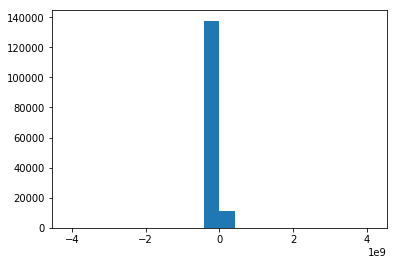

In [379]:
#pd.options.display.float_format = '{:20, .2f}'.format

minent = all_data_grouped['ent'].min()
maxent = all_data_grouped['ent'].max()

plt.pyplot.hist(all_data_grouped['ent'], bins=20, range=[minent, maxent])
#all_data_grouped.hist(column='ent', bins=10).ticklabel_format(useOffset=False)

In [385]:
all_data_grouped.loc[(all_data_grouped['ent']<0), 'ent']=np.nan
all_data_grouped.loc[(all_data_grouped['ext']<0), 'ext']=np.nan
all_data_grouped.reset_index(drop=True,inplace=True)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B90BCE5EB8>]]


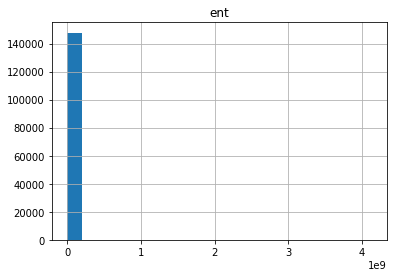

In [386]:
histogram = all_data_grouped.hist(column='ent', bins=20)
print(histogram)
plt.pyplot.rcParams["figure.figsize"] = [6,4]

## Beginning to visualize the data

In [391]:
all_data_grouped.head()

ValueError: Invalid format specifier

ValueError: Invalid format specifier

In [380]:
condition = (all_data_grouped['STATION']=='116 ST-COLUMBIA') & (all_data_grouped['LINENAME']=="1")
columbia_df = all_data_grouped[condition]

In [381]:
columbia_df.reset_index(inplace=True, drop=True)

In [383]:
columbia_df.head()

ValueError: Invalid format specifier

ValueError: Invalid format specifier

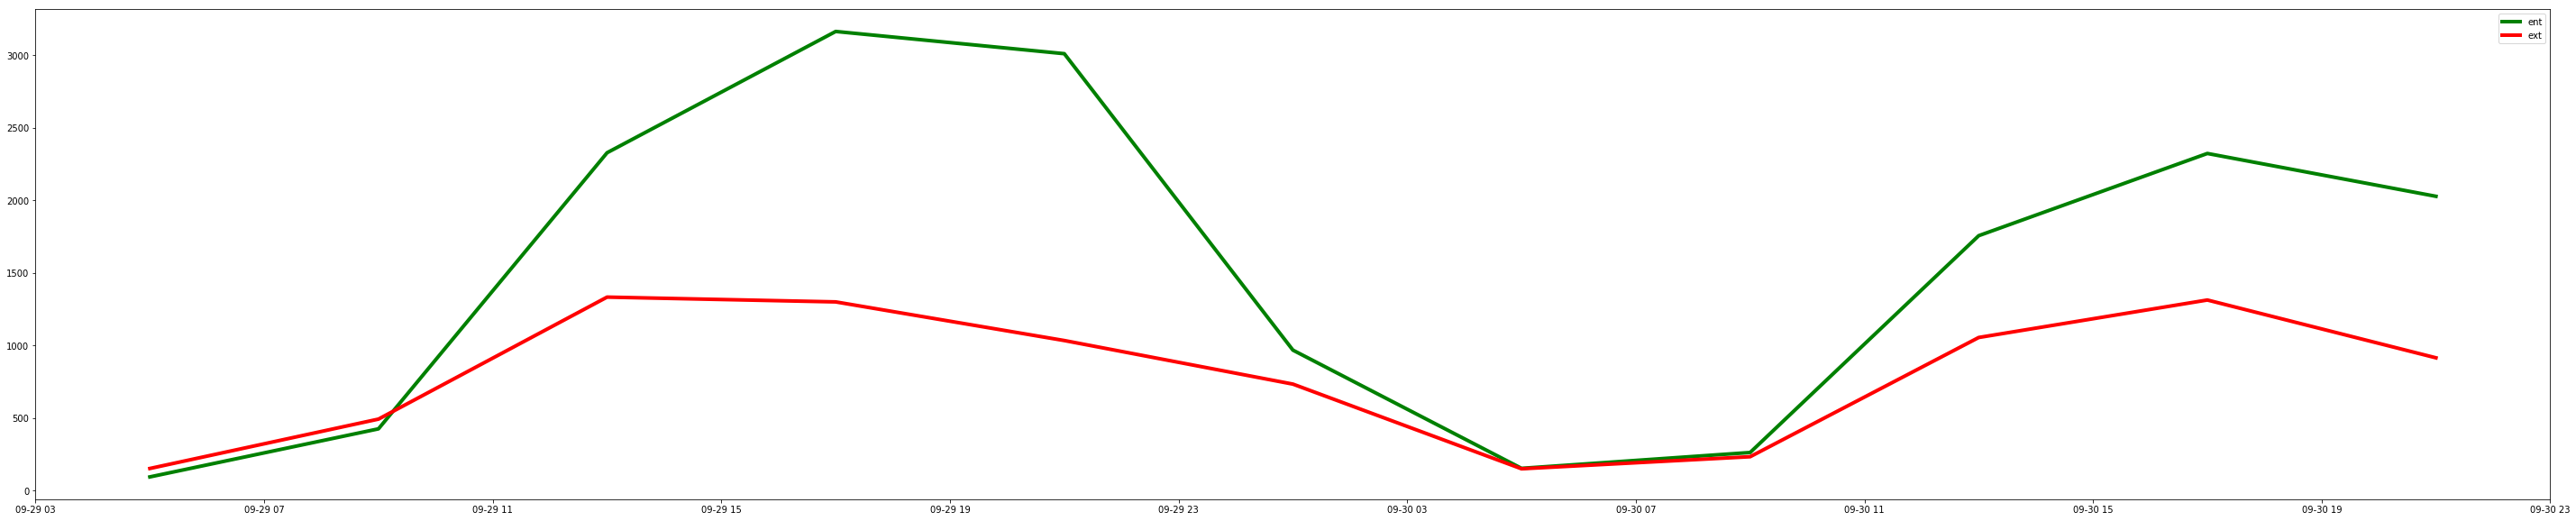

In [296]:
plt.pyplot.plot('DATE_TIME','ent', data=columbia_df3[:12], marker='', color = 'green', linewidth = 4)
plt.pyplot.plot('DATE_TIME','ext', data=columbia_df3[:12], marker='', color = 'red', linewidth = 4)
plt.pyplot.legend()